Loading data...

Matching ETAD and FTIR data...
Matches found: 104

Cleaning and preparing data...
Final clean data points: 104

Calculating MAC value from regression...
Regression Results:
MAC value (slope): 4.018
Intercept: 28.586
R-squared: 0.817

Generating plots...


/var/folders/q8/4q55gl35679357bs417130z40000gn/T/ipykernel_9151/256364859.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df[date_column].dt.month
/var/folders/q8/4q55gl35679357bs417130z40000gn/T/ipykernel_9151/256364859.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Season'] = df['Month'].map(get_season)
/var/folders/q8/4q55gl35679357bs417130z40000gn/T/ipykernel_9151/256364859.py:106: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future versio

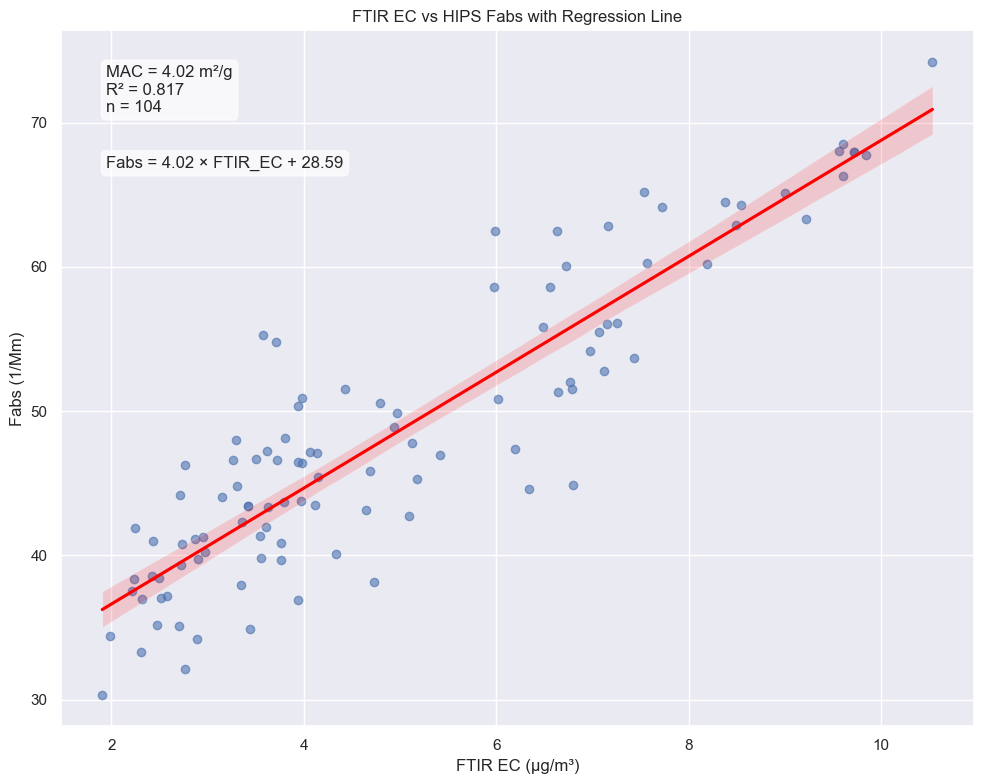

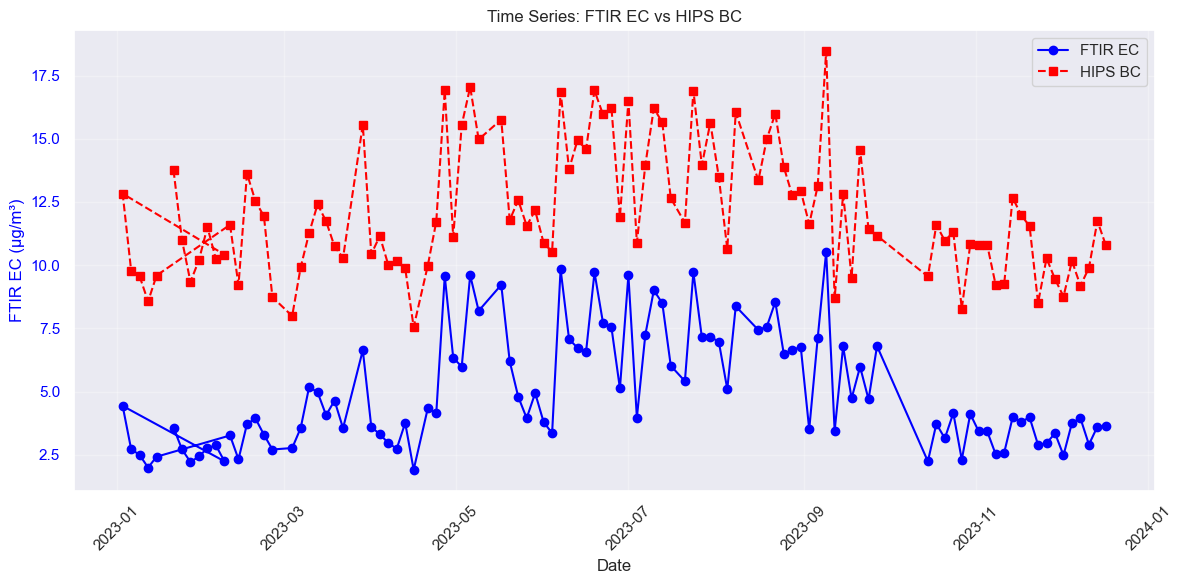

/var/folders/q8/4q55gl35679357bs417130z40000gn/T/ipykernel_9151/256364859.py:209: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = model.params[1]
/var/folders/q8/4q55gl35679357bs417130z40000gn/T/ipykernel_9151/256364859.py:210: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = model.params[0]


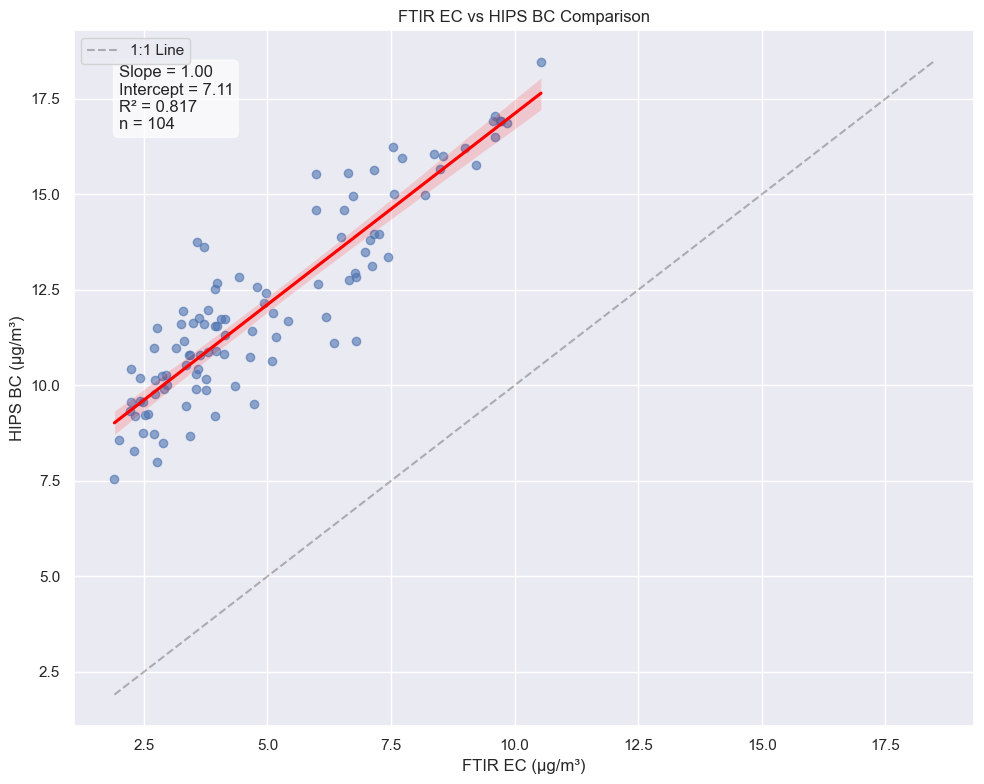


Performing seasonal analysis...

Seasonal Statistics:
       FTIR_EC                        BC_HIPS                 Fabs           
         count      mean       std       mean       std       mean        std
Season                                                                       
Winter      24  3.015880  0.670792  10.622723  1.522100  42.684056   6.116078
Spring      26  5.033206  2.141154  11.931905  2.560729  47.944589  10.289479
Summer      29  7.071749  1.748230  14.163655  2.051900  56.912171   8.244912
Fall        25  4.244212  1.898426  11.135440  2.175854  44.744247   8.742982

Seasonal Correlations:
        Correlation  Sample Size
Season                          
Winter     0.671346         24.0
Spring     0.905868         26.0
Summer     0.933479         29.0
Fall       0.848445         25.0


/var/folders/q8/4q55gl35679357bs417130z40000gn/T/ipykernel_9151/256364859.py:271: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  seasonal_correlations = clean_data.groupby('Season').apply(


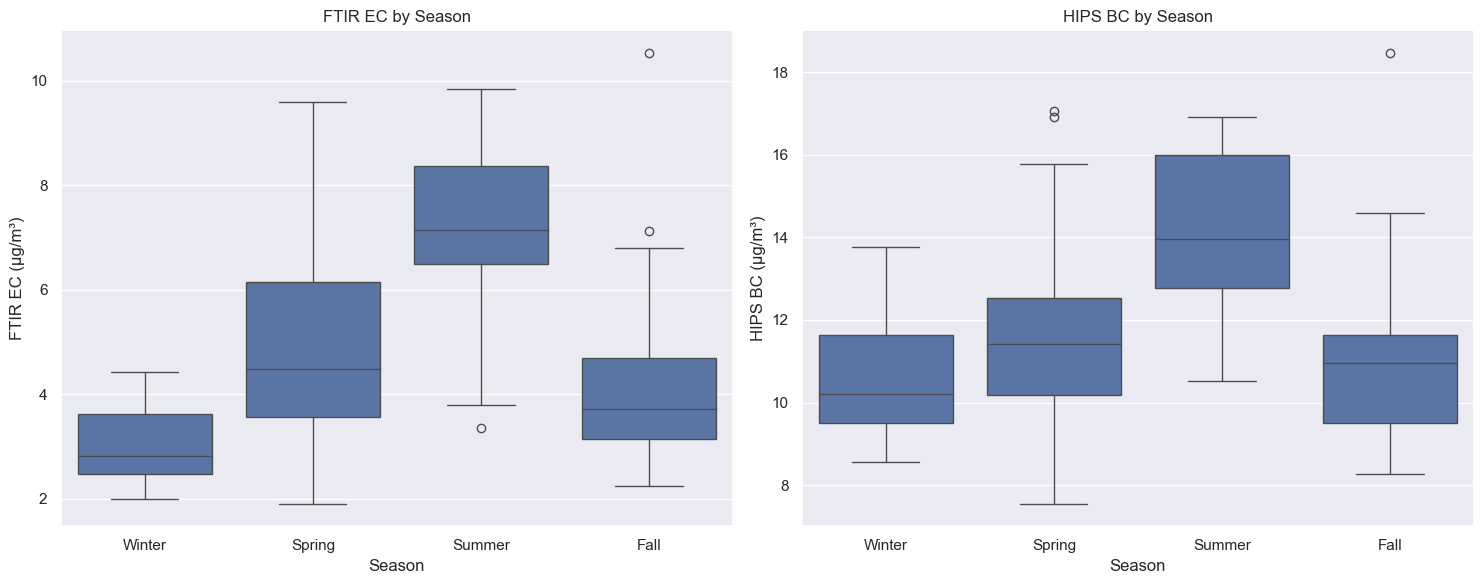

/var/folders/q8/4q55gl35679357bs417130z40000gn/T/ipykernel_9151/256364859.py:326: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = model.params[1]
/var/folders/q8/4q55gl35679357bs417130z40000gn/T/ipykernel_9151/256364859.py:327: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = model.params[0]
/var/folders/q8/4q55gl35679357bs417130z40000gn/T/ipykernel_9151/256364859.py:326: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

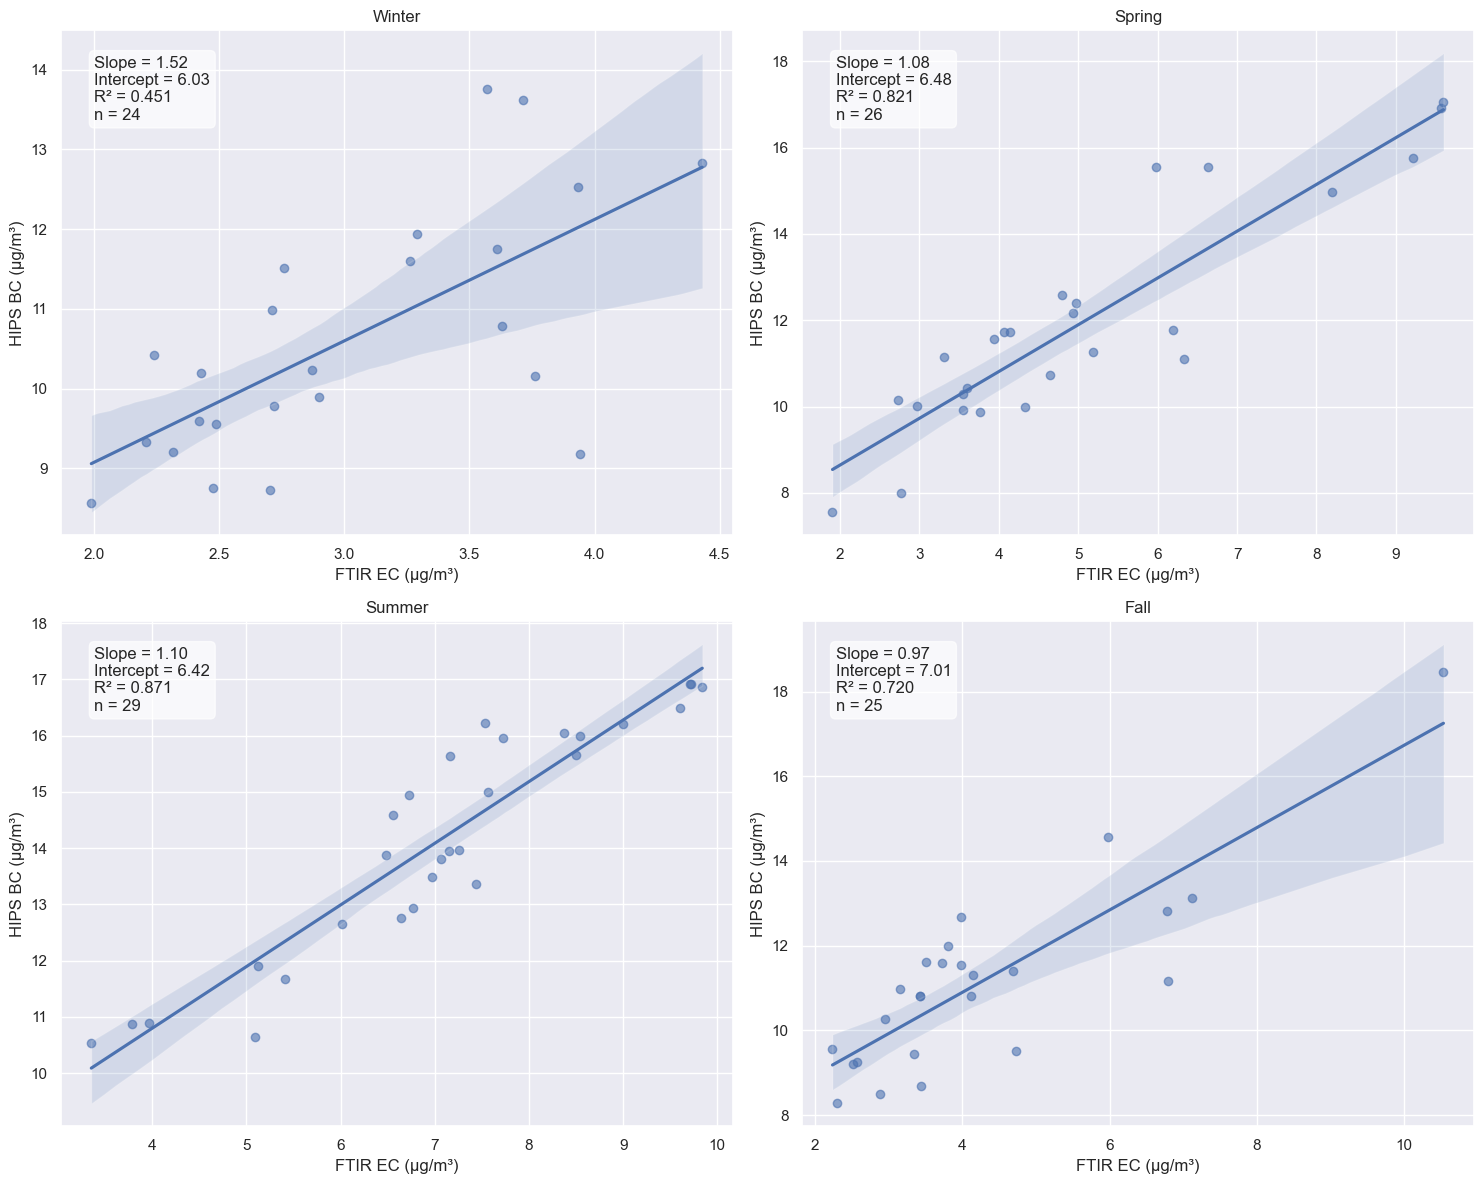


Generating summary statistics...
                   Metric       Value
0             Sample Size  104.000000
1        MAC Value (m²/g)    4.018184
2               R-squared    0.817343
3    FTIR EC Mean (μg/m³)    4.946447
4    HIPS BC Mean (μg/m³)   12.060643
5       FTIR EC Std. Dev.    2.268399
6       HIPS BC Std. Dev.    2.509095
7       Mean Bias (BC-EC)    7.114196
8     Mean Absolute Error    7.114196
9  Root Mean Square Error    7.193793

Analysis complete. Results saved to output/hips_analysis


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import os
from datetime import datetime

# Set plot style
plt.style.use('default')
sns.set_theme()
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100

def load_etad_data(filepath):
    """Load and preprocess ETAD data"""
    etad_data = pd.read_csv(filepath)
    etad_data['SampleDate'] = pd.to_datetime(etad_data['SampleDate'])
    return etad_data

def load_ftir_data(filepaths):
    """Load and combine FTIR data from multiple batches"""
    dataframes = []
    for filepath in filepaths:
        df = pd.read_csv(filepath)
        dataframes.append(df)
    
    combined_df = pd.concat(dataframes, ignore_index=True)
    combined_df['date'] = pd.to_datetime(combined_df['date'])
    return combined_df

def create_season_column(df, date_column='SampleDate'):
    """Add season column based on month"""
    def get_season(month):
        if month in [12, 1, 2]:
            return 'Winter'
        elif month in [3, 4, 5]:
            return 'Spring'
        elif month in [6, 7, 8]:
            return 'Summer'
        else:
            return 'Fall'
    
    # Extract month from the date column
    if isinstance(df[date_column].iloc[0], pd.Timestamp):
        df['Month'] = df[date_column].dt.month
    else:
        df['Month'] = pd.to_datetime(df[date_column]).dt.month
    
    # Apply the season mapping
    df['Season'] = df['Month'].map(get_season)
    return df

def match_etad_ftir_data(etad_data, ftir_data, site='ETAD', year=2023):
    """Match ETAD and FTIR data for analysis"""
    # Filter data for the specified site and year
    etad_filtered = etad_data[
        (etad_data['Site'] == site) & 
        (etad_data['SampleDate'].dt.year == year)
    ].copy()
    
    ftir_filtered = ftir_data[
        (ftir_data['site'] == site) & 
        (ftir_data['date'].dt.year == year)
    ].copy()
    
    # Initialize combined dataset
    analysis_data = etad_filtered.copy()
    analysis_data['FTIR_EC'] = np.nan
    
    # Match samples by date
    matches_found = 0
    for idx, row in analysis_data.iterrows():
        matching_ftir = ftir_filtered[
            (ftir_filtered['date'] == row['SampleDate']) &
            (ftir_filtered['site'] == site)
        ]
        if not matching_ftir.empty:
            analysis_data.at[idx, 'FTIR_EC'] = matching_ftir.iloc[0]['FTIR_EC']
            matches_found += 1
    
    print(f"Matches found: {matches_found}")
    return analysis_data

def clean_analysis_data(analysis_data):
    """Clean and prepare data for analysis"""
    # Convert columns to numeric
    analysis_data['FTIR_EC'] = pd.to_numeric(analysis_data['FTIR_EC'], errors='coerce')
    analysis_data['Fabs'] = pd.to_numeric(analysis_data['Fabs'], errors='coerce')
    
    # Remove rows with missing values
    clean_data = analysis_data.dropna(subset=['FTIR_EC', 'Fabs'])
    print(f"Final clean data points: {len(clean_data)}")
    return clean_data

def calculate_mac_from_regression(clean_data):
    """Calculate MAC value from regression of Fabs vs FTIR_EC"""
    # Run regression analysis
    X = clean_data['FTIR_EC']
    y = clean_data['Fabs']
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    
    # Extract slope (MAC value)
    mac = model.params[1]
    intercept = model.params[0]
    r_squared = model.rsquared
    
    print(f"Regression Results:")
    print(f"MAC value (slope): {mac:.3f}")
    print(f"Intercept: {intercept:.3f}")
    print(f"R-squared: {r_squared:.3f}")
    
    return {
        'mac': mac,
        'intercept': intercept,
        'r_squared': r_squared,
        'model': model
    }

def convert_fabs_to_bc(fabs, mac):
    """Convert Fabs (1/Mm) to BC (μg/m³) using MAC value"""
    return fabs / mac

def plot_regression(clean_data, regression_results, output_dir=None):
    """Create regression plot with statistics"""
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Create scatter plot
    sns.regplot(data=clean_data, x='FTIR_EC', y='Fabs', 
                scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'}, ax=ax)
    
    # Add regression details
    mac = regression_results['mac']
    intercept = regression_results['intercept']
    r_squared = regression_results['r_squared']
    
    equation = f"Fabs = {mac:.2f} × FTIR_EC + {intercept:.2f}"
    stats_text = f"MAC = {mac:.2f} m²/g\nR² = {r_squared:.3f}\nn = {len(clean_data)}"
    
    # Add text box with statistics
    props = dict(boxstyle='round', facecolor='white', alpha=0.7)
    ax.text(0.05, 0.95, stats_text, transform=ax.transAxes, 
            verticalalignment='top', bbox=props)
    
    # Add equation
    ax.text(0.05, 0.82, equation, transform=ax.transAxes, 
            verticalalignment='top', bbox=props)
    
    ax.set_title('FTIR EC vs HIPS Fabs with Regression Line')
    ax.set_xlabel('FTIR EC (μg/m³)')
    ax.set_ylabel('Fabs (1/Mm)')
    
    plt.tight_layout()
    
    if output_dir:
        os.makedirs(output_dir, exist_ok=True)
        plt.savefig(os.path.join(output_dir, 'ftir_ec_vs_hips_fabs_regression.png'), dpi=300)
    
    plt.show()
    return fig

def plot_time_series(clean_data, mac, output_dir=None):
    """Create time series plot with both original and converted values"""
    fig, ax1 = plt.subplots(figsize=(12, 6))
    
    # Add calculated BC values
    clean_data = clean_data.copy()
    clean_data['BC_HIPS'] = convert_fabs_to_bc(clean_data['Fabs'], mac)
    
    # Plot FTIR_EC
    ax1.plot(clean_data['SampleDate'], clean_data['FTIR_EC'], 'o-', 
            color='blue', label='FTIR EC')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('FTIR EC (μg/m³)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    
    # Plot BC_HIPS on the same y-axis
    ax1.plot(clean_data['SampleDate'], clean_data['BC_HIPS'], 's--', 
            color='red', label='HIPS BC')
    
    # Common formatting
    plt.title('Time Series: FTIR EC vs HIPS BC')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    if output_dir:
        os.makedirs(output_dir, exist_ok=True)
        plt.savefig(os.path.join(output_dir, 'ftir_ec_vs_hips_bc_time_series.png'), dpi=300)
    
    plt.show()
    return fig

def plot_bc_comparison(clean_data, mac, output_dir=None):
    """Create comparison scatter plot between FTIR EC and calculated HIPS BC"""
    # Calculate BC values
    clean_data = clean_data.copy()
    clean_data['BC_HIPS'] = convert_fabs_to_bc(clean_data['Fabs'], mac)
    
    # Create regression model for BC comparison
    X = clean_data['FTIR_EC']
    y = clean_data['BC_HIPS']
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    
    slope = model.params[1]
    intercept = model.params[0]
    r_squared = model.rsquared
    
    # Create figure
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Plot scatter and regression line
    sns.regplot(data=clean_data, x='FTIR_EC', y='BC_HIPS', 
                scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'}, ax=ax)
    
    # Add 1:1 line
    min_val = min(clean_data['FTIR_EC'].min(), clean_data['BC_HIPS'].min())
    max_val = max(clean_data['FTIR_EC'].max(), clean_data['BC_HIPS'].max())
    
    ax.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.3, label='1:1 Line')
    
    # Add statistics
    equation = f"BC_HIPS = {slope:.2f} × FTIR_EC + {intercept:.2f}"
    stats_text = f"Slope = {slope:.2f}\nIntercept = {intercept:.2f}\nR² = {r_squared:.3f}\nn = {len(clean_data)}"
    
    props = dict(boxstyle='round', facecolor='white', alpha=0.7)
    ax.text(0.05, 0.95, stats_text, transform=ax.transAxes, 
            verticalalignment='top', bbox=props)
    
    ax.set_title('FTIR EC vs HIPS BC Comparison')
    ax.set_xlabel('FTIR EC (μg/m³)')
    ax.set_ylabel('HIPS BC (μg/m³)')
    ax.legend()
    
    plt.tight_layout()
    
    if output_dir:
        os.makedirs(output_dir, exist_ok=True)
        plt.savefig(os.path.join(output_dir, 'ftir_ec_vs_hips_bc_comparison.png'), dpi=300)
    
    plt.show()
    return fig

def analyze_seasonal_data(clean_data, mac, output_dir=None):
    """Analyze and plot data by season"""
    # Calculate BC values
    clean_data = clean_data.copy()
    clean_data['BC_HIPS'] = convert_fabs_to_bc(clean_data['Fabs'], mac)
    
    # Order seasons correctly
    season_order = ['Winter', 'Spring', 'Summer', 'Fall']
    
    # Calculate seasonal statistics
    seasonal_stats = clean_data.groupby('Season').agg({
        'FTIR_EC': ['count', 'mean', 'std'],
        'BC_HIPS': ['mean', 'std'],
        'Fabs': ['mean', 'std']
    })
    
    # Reorder the seasons
    seasonal_stats = seasonal_stats.reindex(season_order)
    
    print("\nSeasonal Statistics:")
    print(seasonal_stats)
    
    # Calculate correlations by season
    seasonal_correlations = clean_data.groupby('Season').apply(
        lambda x: pd.Series({
            'Correlation': x['FTIR_EC'].corr(x['BC_HIPS']),
            'Sample Size': len(x)
        })
    )
    
    seasonal_correlations = seasonal_correlations.reindex(season_order)
    print("\nSeasonal Correlations:")
    print(seasonal_correlations)
    
    # Create seasonal box plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Box plot for FTIR EC
    sns.boxplot(data=clean_data, x='Season', y='FTIR_EC', 
                order=season_order, ax=ax1)
    ax1.set_title('FTIR EC by Season')
    ax1.set_xlabel('Season')
    ax1.set_ylabel('FTIR EC (μg/m³)')
    
    # Box plot for HIPS BC
    sns.boxplot(data=clean_data, x='Season', y='BC_HIPS', 
                order=season_order, ax=ax2)
    ax2.set_title('HIPS BC by Season')
    ax2.set_xlabel('Season')
    ax2.set_ylabel('HIPS BC (μg/m³)')
    
    plt.tight_layout()
    
    if output_dir:
        os.makedirs(output_dir, exist_ok=True)
        plt.savefig(os.path.join(output_dir, 'seasonal_boxplots.png'), dpi=300)
    
    plt.show()
    
    # Create seasonal correlation plots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.flatten()
    
    for i, season in enumerate(season_order):
        season_data = clean_data[clean_data['Season'] == season]
        if len(season_data) > 0:
            ax = axes[i]
            sns.regplot(data=season_data, x='FTIR_EC', y='BC_HIPS', 
                        scatter_kws={'alpha': 0.6}, ax=ax)
            
            # Calculate statistics for this season
            X = season_data['FTIR_EC']
            y = season_data['BC_HIPS']
            if len(X) > 1:  # Need at least 2 points for regression
                X = sm.add_constant(X)
                model = sm.OLS(y, X).fit()
                
                r_squared = model.rsquared
                slope = model.params[1]
                intercept = model.params[0]
                
                stats_text = f"Slope = {slope:.2f}\nIntercept = {intercept:.2f}\nR² = {r_squared:.3f}\nn = {len(season_data)}"
                props = dict(boxstyle='round', facecolor='white', alpha=0.7)
                ax.text(0.05, 0.95, stats_text, transform=ax.transAxes, 
                        verticalalignment='top', bbox=props)
            
            ax.set_title(f'{season}')
            ax.set_xlabel('FTIR EC (μg/m³)')
            ax.set_ylabel('HIPS BC (μg/m³)')
    
    plt.tight_layout()
    
    if output_dir:
        os.makedirs(output_dir, exist_ok=True)
        plt.savefig(os.path.join(output_dir, 'seasonal_correlations.png'), dpi=300)
    
    plt.show()
    
    return {
        'seasonal_stats': seasonal_stats,
        'seasonal_correlations': seasonal_correlations
    }

def generate_summary_stats(clean_data, mac, regression_results):
    """Generate comprehensive summary statistics"""
    # Calculate BC values
    clean_data = clean_data.copy()
    clean_data['BC_HIPS'] = convert_fabs_to_bc(clean_data['Fabs'], mac)
    
    # Calculate residuals
    clean_data['Residuals'] = clean_data['BC_HIPS'] - clean_data['FTIR_EC']
    
    # Create a summary DataFrame
    summary = pd.DataFrame({
        'Metric': [
            'Sample Size',
            'MAC Value (m²/g)',
            'R-squared',
            'FTIR EC Mean (μg/m³)',
            'HIPS BC Mean (μg/m³)',
            'FTIR EC Std. Dev.',
            'HIPS BC Std. Dev.',
            'Mean Bias (BC-EC)',
            'Mean Absolute Error',
            'Root Mean Square Error'
        ],
        'Value': [
            len(clean_data),
            mac,
            regression_results['r_squared'],
            clean_data['FTIR_EC'].mean(),
            clean_data['BC_HIPS'].mean(),
            clean_data['FTIR_EC'].std(),
            clean_data['BC_HIPS'].std(),
            clean_data['Residuals'].mean(),
            clean_data['Residuals'].abs().mean(),
            np.sqrt((clean_data['Residuals']**2).mean())
        ]
    })
    
    return summary

def main():
    # Setup directories
    output_dir = 'output/hips_analysis'
    os.makedirs(output_dir, exist_ok=True)
    
    # Define filepaths - update these with your actual paths
    etad_data_path = "/Users/ahmadjalil/Library/CloudStorage/GoogleDrive-ahzs645@gmail.com/My Drive/University/Research/Grad/UC Davis Ann/NASA MAIA/Data/EC-HIPS-Aeth Comparison/Data/Original Data/FTIR EC/ETAD_data_2023.csv"
    ftir_data_paths = [
        "/Users/ahmadjalil/Library/CloudStorage/GoogleDrive-ahzs645@gmail.com/My Drive/University/Research/Grad/UC Davis Ann/NASA MAIA/Data/EC-HIPS-Aeth Comparison/Data/Original Data/HIPS BC/SPARTAN_FTIR data batch 2 and 3 resubmitted with MDLs.csv",
        "/Users/ahmadjalil/Library/CloudStorage/GoogleDrive-ahzs645@gmail.com/My Drive/University/Research/Grad/UC Davis Ann/NASA MAIA/Data/EC-HIPS-Aeth Comparison/Data/Original Data/HIPS BC/SPARTAN_FTIR data_batch 4_ Nov2022 to March2024.csv"
    ]
    
    # Load data
    print("Loading data...")
    etad_data = load_etad_data(etad_data_path)
    ftir_data = load_ftir_data(ftir_data_paths)
    
    # Match data
    print("\nMatching ETAD and FTIR data...")
    analysis_data = match_etad_ftir_data(etad_data, ftir_data)
    
    # Clean data
    print("\nCleaning and preparing data...")
    clean_data = clean_analysis_data(analysis_data)
    
    # Add season column
    clean_data = create_season_column(clean_data)
    
    # Calculate MAC from regression
    print("\nCalculating MAC value from regression...")
    regression_results = calculate_mac_from_regression(clean_data)
    mac = regression_results['mac']
    
    # Create plots
    print("\nGenerating plots...")
    plot_regression(clean_data, regression_results, output_dir)
    plot_time_series(clean_data, mac, output_dir)
    plot_bc_comparison(clean_data, mac, output_dir)
    
    # Seasonal analysis
    print("\nPerforming seasonal analysis...")
    seasonal_results = analyze_seasonal_data(clean_data, mac, output_dir)
    
    # Generate summary statistics
    print("\nGenerating summary statistics...")
    summary_stats = generate_summary_stats(clean_data, mac, regression_results)
    print(summary_stats)
    
    # Save results to CSV
    summary_stats.to_csv(os.path.join(output_dir, 'summary_statistics.csv'), index=False)
    clean_data.to_csv(os.path.join(output_dir, 'processed_hips_data.csv'))
    
    print(f"\nAnalysis complete. Results saved to {output_dir}")
    
    return {
        'clean_data': clean_data,
        'mac': mac,
        'regression_results': regression_results,
        'seasonal_results': seasonal_results,
        'summary_stats': summary_stats
    }

if __name__ == "__main__":
    main()